# Asistente musical
## Preparación de los datos
### Extracción de Datos con Spotipy

Instalamos los paquetes

In [ ]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 32.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

Cargamos los datos

In [ ]:
data = pd.read_csv('/work/trainingSongs_date_update.csv')
data

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,release_date,mood
0,0,0.357,0.425,5,-7.301,1,0.0333,0.5840,0.000000,0.3220,...,102.078,audio_features,4xqrdfXkTW4T0RauPLv3WA,spotify:track:4xqrdfXkTW4T0RauPLv3WA,https://api.spotify.com/v1/tracks/4xqrdfXkTW4T...,https://api.spotify.com/v1/audio-analysis/4xqr...,198040,3,2020-03-20,sad
1,1,0.557,0.442,5,-7.224,1,0.0243,0.7310,0.000015,0.1100,...,146.277,audio_features,75JFxkI2RXiU7L9VXzMkle,spotify:track:75JFxkI2RXiU7L9VXzMkle,https://api.spotify.com/v1/tracks/75JFxkI2RXiU...,https://api.spotify.com/v1/audio-analysis/75JF...,309600,4,2002-08-08,sad
2,2,0.652,0.557,1,-5.714,0,0.0318,0.7400,0.000000,0.1240,...,150.073,audio_features,2qxmye6gAegTMjLKEBoR3d,spotify:track:2qxmye6gAegTMjLKEBoR3d,https://api.spotify.com/v1/tracks/2qxmye6gAegT...,https://api.spotify.com/v1/audio-analysis/2qxm...,169354,4,2018-11-16,sad
3,3,0.681,0.372,5,-8.237,1,0.0432,0.6400,0.000000,0.1690,...,91.873,audio_features,1mXVgsBdtIVeCLJnSnmtdV,spotify:track:1mXVgsBdtIVeCLJnSnmtdV,https://api.spotify.com/v1/tracks/1mXVgsBdtIVe...,https://api.spotify.com/v1/audio-analysis/1mXV...,201000,4,2017-11-03,sad
4,4,0.367,0.111,4,-14.084,1,0.0972,0.9780,0.000040,0.0897,...,82.642,audio_features,43zdsphuZLzwA9k4DJhU0I,spotify:track:43zdsphuZLzwA9k4DJhU0I,https://api.spotify.com/v1/tracks/43zdsphuZLzw...,https://api.spotify.com/v1/audio-analysis/43zd...,196077,4,2019-03-29,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1116,0.716,0.748,8,-6.060,1,0.0356,0.2350,0.849000,0.1140,...,119.918,audio_features,01kfSdF9zfcDLri5sSWEoL,spotify:track:01kfSdF9zfcDLri5sSWEoL,https://api.spotify.com/v1/tracks/01kfSdF9zfcD...,https://api.spotify.com/v1/audio-analysis/01kf...,169245,4,2022-03-18,energizer
1117,1117,0.778,0.786,3,-4.440,0,0.1150,0.0189,0.000047,0.0678,...,128.007,audio_features,7FvXYkiDWiLgXA9JHUf7Ni,spotify:track:7FvXYkiDWiLgXA9JHUf7Ni,https://api.spotify.com/v1/tracks/7FvXYkiDWiLg...,https://api.spotify.com/v1/audio-analysis/7FvX...,126562,4,2023-03-31,energizer
1118,1118,0.848,0.821,2,-5.408,0,0.0527,0.0169,0.000403,0.0962,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,2021-10-29,energizer
1119,1119,0.653,0.973,11,-3.894,1,0.0414,0.0338,0.006860,0.2990,...,128.024,audio_features,7wy8gxfen0STJ2jQMYQBAA,spotify:track:7wy8gxfen0STJ2jQMYQBAA,https://api.spotify.com/v1/tracks/7wy8gxfen0ST...,https://api.spotify.com/v1/audio-analysis/7wy8...,157573,4,2023-03-24,energizer


### Eliminación de datos duplicados

**Mostramos** las columnas **duplicadas**



**Eliminamos** las 137 filas duplicadas quedándonos con la primera aparición de ellos y mostramos las restantes.

In [ ]:
data = data.drop_duplicates(subset="id",keep="first")

In [ ]:
data

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,release_date,mood
0,0,0.357,0.425,5,-7.301,1,0.0333,0.5840,0.000000,0.3220,...,102.078,audio_features,4xqrdfXkTW4T0RauPLv3WA,spotify:track:4xqrdfXkTW4T0RauPLv3WA,https://api.spotify.com/v1/tracks/4xqrdfXkTW4T...,https://api.spotify.com/v1/audio-analysis/4xqr...,198040,3,2020-03-20,sad
1,1,0.557,0.442,5,-7.224,1,0.0243,0.7310,0.000015,0.1100,...,146.277,audio_features,75JFxkI2RXiU7L9VXzMkle,spotify:track:75JFxkI2RXiU7L9VXzMkle,https://api.spotify.com/v1/tracks/75JFxkI2RXiU...,https://api.spotify.com/v1/audio-analysis/75JF...,309600,4,2002-08-08,sad
2,2,0.652,0.557,1,-5.714,0,0.0318,0.7400,0.000000,0.1240,...,150.073,audio_features,2qxmye6gAegTMjLKEBoR3d,spotify:track:2qxmye6gAegTMjLKEBoR3d,https://api.spotify.com/v1/tracks/2qxmye6gAegT...,https://api.spotify.com/v1/audio-analysis/2qxm...,169354,4,2018-11-16,sad
3,3,0.681,0.372,5,-8.237,1,0.0432,0.6400,0.000000,0.1690,...,91.873,audio_features,1mXVgsBdtIVeCLJnSnmtdV,spotify:track:1mXVgsBdtIVeCLJnSnmtdV,https://api.spotify.com/v1/tracks/1mXVgsBdtIVe...,https://api.spotify.com/v1/audio-analysis/1mXV...,201000,4,2017-11-03,sad
4,4,0.367,0.111,4,-14.084,1,0.0972,0.9780,0.000040,0.0897,...,82.642,audio_features,43zdsphuZLzwA9k4DJhU0I,spotify:track:43zdsphuZLzwA9k4DJhU0I,https://api.spotify.com/v1/tracks/43zdsphuZLzw...,https://api.spotify.com/v1/audio-analysis/43zd...,196077,4,2019-03-29,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1116,0.716,0.748,8,-6.060,1,0.0356,0.2350,0.849000,0.1140,...,119.918,audio_features,01kfSdF9zfcDLri5sSWEoL,spotify:track:01kfSdF9zfcDLri5sSWEoL,https://api.spotify.com/v1/tracks/01kfSdF9zfcD...,https://api.spotify.com/v1/audio-analysis/01kf...,169245,4,2022-03-18,energizer
1117,1117,0.778,0.786,3,-4.440,0,0.1150,0.0189,0.000047,0.0678,...,128.007,audio_features,7FvXYkiDWiLgXA9JHUf7Ni,spotify:track:7FvXYkiDWiLgXA9JHUf7Ni,https://api.spotify.com/v1/tracks/7FvXYkiDWiLg...,https://api.spotify.com/v1/audio-analysis/7FvX...,126562,4,2023-03-31,energizer
1118,1118,0.848,0.821,2,-5.408,0,0.0527,0.0169,0.000403,0.0962,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,2021-10-29,energizer
1119,1119,0.653,0.973,11,-3.894,1,0.0414,0.0338,0.006860,0.2990,...,128.024,audio_features,7wy8gxfen0STJ2jQMYQBAA,spotify:track:7wy8gxfen0STJ2jQMYQBAA,https://api.spotify.com/v1/tracks/7wy8gxfen0ST...,https://api.spotify.com/v1/audio-analysis/7wy8...,157573,4,2023-03-24,energizer


### Técnicas de "Featuring Engineering"

#### Eliminación de columnas innecesarias para el modelo.

Hemos decidido eliminar una serie de columnas que no guardan mucha correlación con el entrenamiento del modelo en absoluto, o no son relevantes.

Éstas son:
`Unnamed:0`,`key`,`duration_ms`,`analysis_url`,`mode`,`track_href`,`time_signature`,`key`,`time_signature`,`liveness`,`uri`,`type`.

In [ ]:
data.drop(columns = ['Unnamed: 0','key','duration_ms','analysis_url','mode','track_href','time_signature','key','time_signature','liveness','uri','type'], inplace=True)

/shared-libs/python3.11/py/lib/python3.11/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Distinción de columnas y cambios en el nombre

Por decisión general del grupo, se ha decidido **separar** la columna **mood** en otra más donde se diferencie enetre **relax y enérgico**.

A continuación, vamos a establecer una serie de **parámetros** que **facilitarán** al modelo su **entrenamiento** y además permitirán **distinguir** aún más su **finalidad**.

- En primer lugar, crearemos una separación entre `mood` que sólo será `sad` o `happy`. Una canción se considerará feliz cuando supera el 0.6 de `valencia` que es el campo que indica que la letra de una canción es feliz del 0 al 1.

- En segundo lugar, crearemos la columna `motivation` que contará con los valores restantes del `mood` anteriormente mencionado, englobando tanto `energizing` como `relaxing`. El valor que los distingue en este caso es la columna `energy` donde las canciones que no superen el valor 0.4 de energía se considerarán `relaxing` y las que superan el 0.6 se considerarán `energizing`.

Por último, cambiaremos los valores también a 0 o 1 dependiendo de los 2 campos anteriores. De éste modo, lograremos entrenar el modelo de forma eficaz.

Para ello hemos creado las siguientes funciones:

In [ ]:
def determinar_mood(valence):
    if valence < 0.4:
        return 0
    elif valence > 0.6:
        return 1
    else:
        return None

def determinar_motivation(energy):
    if energy < 0.4:
        return 0
    elif energy > 0.6:
        return 1
    else:
        return None

Aplicamos las funciones a las columnas del DataFrame

In [ ]:
data['mood'] = data['valence'].apply(determinar_mood)
data['motivation'] = data['energy'].apply(determinar_motivation)

/tmp/ipykernel_109/1649202492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mood'] = data['valence'].apply(determinar_mood)
/tmp/ipykernel_109/1649202492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['motivation'] = data['energy'].apply(determinar_motivation)


In [ ]:
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,id,release_date,mood,motivation
0,0.357,0.425,-7.301,0.0333,0.5840,0.000000,0.270,102.078,4xqrdfXkTW4T0RauPLv3WA,2020-03-20,0.0,NaN
1,0.557,0.442,-7.224,0.0243,0.7310,0.000015,0.213,146.277,75JFxkI2RXiU7L9VXzMkle,2002-08-08,0.0,NaN
2,0.652,0.557,-5.714,0.0318,0.7400,0.000000,0.483,150.073,2qxmye6gAegTMjLKEBoR3d,2018-11-16,NaN,NaN
3,0.681,0.372,-8.237,0.0432,0.6400,0.000000,0.476,91.873,1mXVgsBdtIVeCLJnSnmtdV,2017-11-03,NaN,0.0
4,0.367,0.111,-14.084,0.0972,0.9780,0.000040,0.198,82.642,43zdsphuZLzwA9k4DJhU0I,2019-03-29,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.716,0.748,-6.060,0.0356,0.2350,0.849000,0.338,119.918,01kfSdF9zfcDLri5sSWEoL,2022-03-18,0.0,1.0
1117,0.778,0.786,-4.440,0.1150,0.0189,0.000047,0.562,128.007,7FvXYkiDWiLgXA9JHUf7Ni,2023-03-31,NaN,1.0
1118,0.848,0.821,-5.408,0.0527,0.0169,0.000403,0.249,125.051,6GomT970rCOkKAyyrwJeZi,2021-10-29,0.0,1.0
1119,0.653,0.973,-3.894,0.0414,0.0338,0.006860,0.219,128.024,7wy8gxfen0STJ2jQMYQBAA,2023-03-24,0.0,1.0


Para continuar, vamos a hacer una clasificación de las canciones por décadas en lugar de por años, para ello, hemos creado la siguiente **expresión regular** capaz de hacerlo.

In [ ]:
data['release_decade'] = data['release_date'].str.extract(r'(\d{4})').astype(int) // 10 * 10
data['release_decade'] = data['release_decade'].astype(str) + 's'
data

/tmp/ipykernel_109/2881882289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_decade'] = data['release_date'].str.extract(r'(\d{4})').astype(int) // 10 * 10
/tmp/ipykernel_109/2881882289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_decade'] = data['release_decade'].astype(str) + 's'


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,id,release_date,mood,motivation,release_decade
0,0.357,0.425,-7.301,0.0333,0.5840,0.000000,0.270,102.078,4xqrdfXkTW4T0RauPLv3WA,2020-03-20,0.0,NaN,2020s
1,0.557,0.442,-7.224,0.0243,0.7310,0.000015,0.213,146.277,75JFxkI2RXiU7L9VXzMkle,2002-08-08,0.0,NaN,2000s
2,0.652,0.557,-5.714,0.0318,0.7400,0.000000,0.483,150.073,2qxmye6gAegTMjLKEBoR3d,2018-11-16,NaN,NaN,2010s
3,0.681,0.372,-8.237,0.0432,0.6400,0.000000,0.476,91.873,1mXVgsBdtIVeCLJnSnmtdV,2017-11-03,NaN,0.0,2010s
4,0.367,0.111,-14.084,0.0972,0.9780,0.000040,0.198,82.642,43zdsphuZLzwA9k4DJhU0I,2019-03-29,0.0,0.0,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.716,0.748,-6.060,0.0356,0.2350,0.849000,0.338,119.918,01kfSdF9zfcDLri5sSWEoL,2022-03-18,0.0,1.0,2020s
1117,0.778,0.786,-4.440,0.1150,0.0189,0.000047,0.562,128.007,7FvXYkiDWiLgXA9JHUf7Ni,2023-03-31,NaN,1.0,2020s
1118,0.848,0.821,-5.408,0.0527,0.0169,0.000403,0.249,125.051,6GomT970rCOkKAyyrwJeZi,2021-10-29,0.0,1.0,2020s
1119,0.653,0.973,-3.894,0.0414,0.0338,0.006860,0.219,128.024,7wy8gxfen0STJ2jQMYQBAA,2023-03-24,0.0,1.0,2020s


#### Eliminación de datos outliers

Observamos los posibles valores para `release_decade` puesto que pueden haber canciones que sean de años que pueden ser considerados outliers.

Vamos a tomar como referencia las **canciones a partir de la década de los 80** en adelante.

In [ ]:
data['release_decade'].unique()

array(['2020s', '2000s', '2010s', '1990s', '1980s', '1970s', '1940s',
       '1960s'], dtype=object)

In [ ]:
data.drop(data[data['release_decade'].isin(['1940s', '1960s', '1970s'])].index, inplace=True)

/shared-libs/python3.11/py/lib/python3.11/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Eliminamos la columna `release-date` puesto que ya ha sido simplificada

In [ ]:
data.drop('release_date', axis=1, inplace=True)

In [ ]:
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,id,mood,motivation,release_decade
0,0.357,0.425,-7.301,0.0333,0.5840,0.000000,0.270,102.078,4xqrdfXkTW4T0RauPLv3WA,0.0,NaN,2020s
1,0.557,0.442,-7.224,0.0243,0.7310,0.000015,0.213,146.277,75JFxkI2RXiU7L9VXzMkle,0.0,NaN,2000s
2,0.652,0.557,-5.714,0.0318,0.7400,0.000000,0.483,150.073,2qxmye6gAegTMjLKEBoR3d,NaN,NaN,2010s
3,0.681,0.372,-8.237,0.0432,0.6400,0.000000,0.476,91.873,1mXVgsBdtIVeCLJnSnmtdV,NaN,0.0,2010s
4,0.367,0.111,-14.084,0.0972,0.9780,0.000040,0.198,82.642,43zdsphuZLzwA9k4DJhU0I,0.0,0.0,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.716,0.748,-6.060,0.0356,0.2350,0.849000,0.338,119.918,01kfSdF9zfcDLri5sSWEoL,0.0,1.0,2020s
1117,0.778,0.786,-4.440,0.1150,0.0189,0.000047,0.562,128.007,7FvXYkiDWiLgXA9JHUf7Ni,NaN,1.0,2020s
1118,0.848,0.821,-5.408,0.0527,0.0169,0.000403,0.249,125.051,6GomT970rCOkKAyyrwJeZi,0.0,1.0,2020s
1119,0.653,0.973,-3.894,0.0414,0.0338,0.006860,0.219,128.024,7wy8gxfen0STJ2jQMYQBAA,0.0,1.0,2020s


#### Eliminación de datos vacíos/nulos

Vamos a **eliminar** aquellas columnas que tengan valores `None` puesto que van a generar confusión a posteriori al modelo.

Eliminamos los datos etiquetados como `None`

In [ ]:
data = data.dropna()

In [ ]:
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,id,mood,motivation,release_decade
4,0.367,0.111,-14.084,0.0972,0.9780,0.000040,0.1980,82.642,43zdsphuZLzwA9k4DJhU0I,0.0,0.0,2010s
6,0.369,0.272,-10.497,0.0364,0.8660,0.000000,0.2180,172.929,5JCoSi02qi3jJeHdZXMmR8,0.0,0.0,2020s
8,0.614,0.379,-10.480,0.0476,0.6070,0.000464,0.2010,107.989,1HNkqx9Ahdgi1Ixy2xkKkL,0.0,0.0,2010s
10,0.567,0.267,-6.502,0.0299,0.8390,0.000001,0.0592,110.011,1ZMiCix7XSAbfAJlEZWMCp,0.0,0.0,2010s
11,0.351,0.296,-10.109,0.0333,0.9340,0.000000,0.1200,115.284,0u2P5u6lvoDfwTYjAADbn4,0.0,0.0,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...
1113,0.835,0.903,-3.230,0.2280,0.0153,0.000124,0.7330,128.010,3tSYFt9i23oFzyX6tg5IOg,1.0,1.0,2020s
1116,0.716,0.748,-6.060,0.0356,0.2350,0.849000,0.3380,119.918,01kfSdF9zfcDLri5sSWEoL,0.0,1.0,2020s
1118,0.848,0.821,-5.408,0.0527,0.0169,0.000403,0.2490,125.051,6GomT970rCOkKAyyrwJeZi,0.0,1.0,2020s
1119,0.653,0.973,-3.894,0.0414,0.0338,0.006860,0.2190,128.024,7wy8gxfen0STJ2jQMYQBAA,0.0,1.0,2020s


Como podemos ver, hemos perdido un total de 407 filas, sin embargo, las 635 filas con las que contamos serán mucho más precisas para entrenar el modelo a posteriori con nuevos datos.

### Muestra de correlaciones tras el tratamiento de datos

Vamos a observar cómo han quedado las correlaciones

In [ ]:
processed_data_corr = data.corr()

Observamos la nueva gráfica con las correlaciones

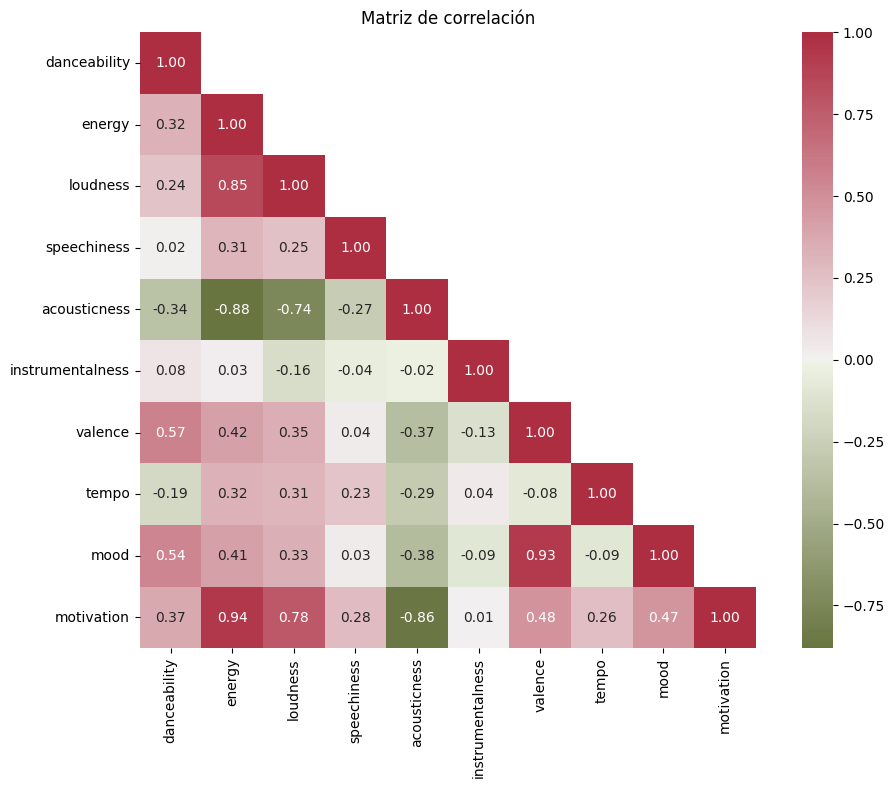

In [ ]:
# Máscara para pasar los datos a valores de 0 a 1
mask = np.triu(np.ones_like(processed_data_corr, dtype=bool), k=1)

# Paleta de colores
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)

#Gráfica
plt.figure(figsize=(12,8))
sns.heatmap(processed_data_corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.title('Matriz de correlación')
plt.show()

Como podemos observar, han aparecido nuevas correlaciones que aportarán mucha precisión al modelo.

- **motivation + energy** (94%): Con estos valores tenemos claro que existe **mucha complicidad** con los valores, cuando una canción tiene un **mayor índice de energía** existe **mayor posibilidad** de que esa canción se considere **enérgica o motivadora**, éste dato es **fundamental** puesto que elegirá cuando una **canción es enérgica o** por lo contrario, es más **relajada**.

- **motivation + loudness** (78%): Con estos valores tenemos claro que existe **buena complicidad** con los valores, cuando una canción tiene un **mayor volumen** existe **mayor posibilidad** de que esa canción se considere **enérgica o motivadora**, éste dato es **fundamental** puesto que elegirá cuando una **canción es enérgica o** por lo contrario, es más **relajada**.

- **mood + valence** (93%): Con estos valores tenemos claro que existe **bastante complicidad** con los valores, cuando una canción tiene una **letra más positiva** existe **mayor posibilidad** de que esa canción se considere **happy (feliz)**, éste dato es **fundamental** puesto que elegirá cuando una **canción es feliz o** por lo contrario, es más **triste**.

Todo está listo para el entrenamiento del modelo